# Overview
In this project the prediction of top 10 most consumed yields all over the world is established by applying machine learning techniques. It consist of 10 most consumed crops. It is a regression problem. These corps include :

* Cassava
* Maize
* Plantains and others
* Potatoes
* Rice, paddy
* Sorghum
* Soybeans
* Sweet potatoes
* Wheat
* Yams

# Step 1: Import the required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load Data

In [2]:
df_yield = pd.read_csv("/kaggle/input/crop-yield-prediction-dataset/yield.csv")
df_temp= pd.read_csv("/kaggle/input/crop-yield-prediction-dataset/temp.csv")
df_rainfall = pd.read_csv("/kaggle/input/crop-yield-prediction-dataset/rainfall.csv")
df_pesticides = pd.read_csv("/kaggle/input/crop-yield-prediction-dataset/pesticides.csv")
df_yield_df = pd.read_csv("/kaggle/input/crop-yield-prediction-dataset/yield_df.csv")

# Step 3: Data Understanding

In [3]:
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [4]:
df_temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [5]:
df_rainfall.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [6]:
df_pesticides.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [7]:
df_yield_df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


# Step 4: Data Cleaning

In [8]:
# Rename column
df_yield_df = df_yield_df.rename(index=str, columns={"hg/ha_yield": "Yield"})
df_yield_df.head()

,Unnamed: 0,Area,Item,Year,Yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [9]:
# Drop unwanted column and rename data frame
df = df_yield_df.drop(['Unnamed: 0'], axis=1)
df.head()

,Area,Item,Year,Yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [10]:
df.shape

(28242, 7)

In [11]:
df.describe()

,Year,Yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [12]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
Yield                            0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [13]:
df.groupby('Item').count()

,Area,Year,Yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


The dataframe has 101 Countries, ordering these by 10 the highest yield production:

In [14]:
df.groupby(['Area'],sort=True)['Yield'].sum().nlargest(10)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: Yield, dtype: int64

# Step 5: Encoding Categorical Variables

In [15]:
from sklearn.preprocessing import OneHotEncoder
df_onehot = pd.get_dummies(df, columns=['Area',"Item"], prefix = ['Country',"Item"])
features=df_onehot.loc[:, df_onehot.columns != 'Yield']
label=df['Yield']
features.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [16]:
features = features.drop(['Year'], axis=1)

In [17]:
features.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


# Step 6: Features Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features) 

# Step 7: Split data into train and test set

In [19]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

# Step 8: Model Comparison & Selection

In [20]:
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
     RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
   DecisionTreeRegressor()
]

In [22]:
model_train=list(map(compare_models,models)) 

In [23]:
print(*model_train, sep = "\n")

['GradientBoostingRegressor', 0.8965768919264416]
['RandomForestRegressor', 0.6842532317855172]
['SVR', -0.19543203867357395]
['DecisionTreeRegressor', 0.9608541005257025]


# Step 9: Use Best Model

In [24]:
clf=DecisionTreeRegressor()
model=clf.fit(train_data,train_labels)
prediction=model.predict(test_data)
print(prediction)

[72172. 25000. 55615. ... 20124. 80000. 24105.]


In [25]:
actual = pd.DataFrame(test_labels)["Yield"].tolist()

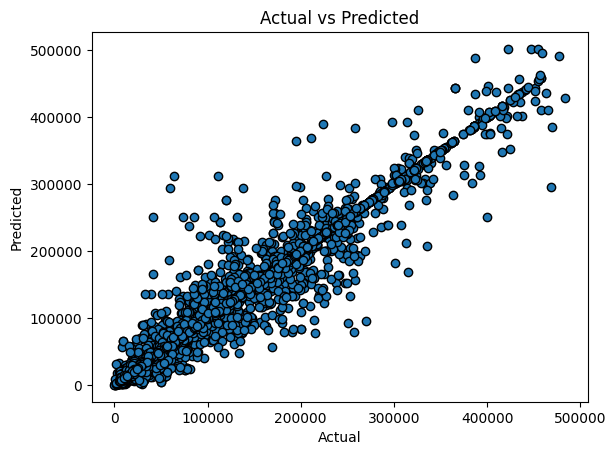

In [26]:
fig, ax = plt.subplots() 

ax.scatter(actual, prediction,edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()